# 1. Install Dependencies and Setup

In [1]:
pip install protobuf==3.20.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow==2.10.0 opencv-python matplotlib

  Using cached tensorflow-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tenso

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [3]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = '../images/data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('../images/data')

Found 2017 files belonging to 4 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
# they give the image numbers based on folder order
# autism images are - 0
# Control Images are - 1
# Parkinson Images are - 2
# Alzheimer images are - 3

batch[1]

array([1, 1, 2, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 0, 0, 3, 3, 2, 2, 3, 3, 1,
       1, 2, 1, 1, 3, 3, 2, 2, 3, 2])

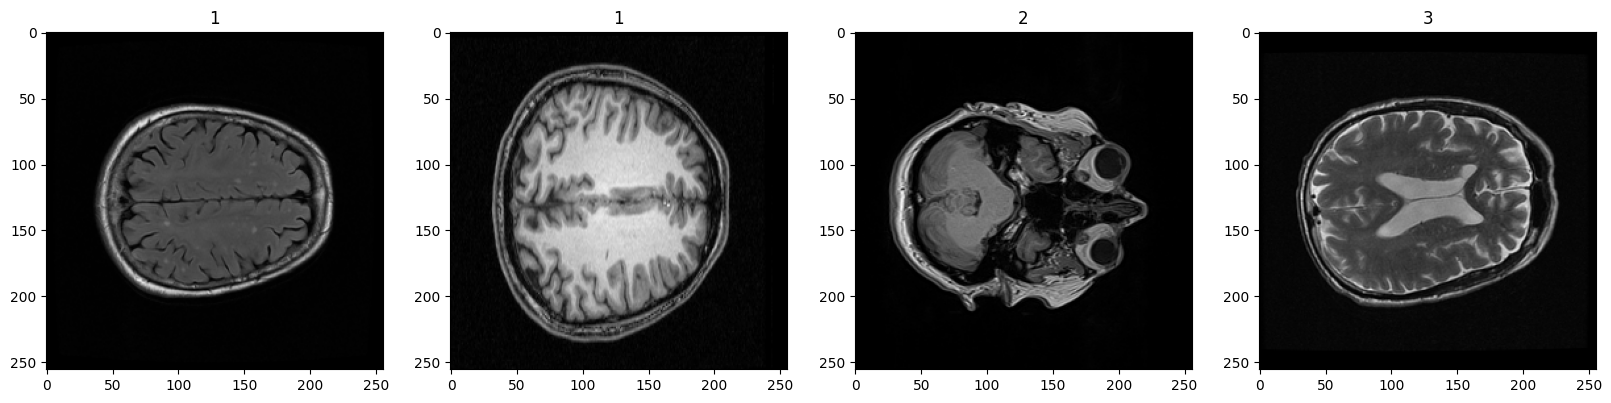

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.02745098, 0.02745098, 0.02745098],
          [0.02352941, 0.02352941, 0.02352941],
          [0.01176471, 0.01176471, 0.01176471],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.        , 0.        , 0.        ]],
 
         [[0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01960784, 0.01960784, 0.01960784],
          ...,
          [0.00784314, 0.00784314, 0.00784314],
          [0.00392157, 0.00392157, 0.00392157],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

# 5. Split Data

In [19]:
len(data)

64

In [20]:
# Images used to train the deep learning model
train_size = int(len(data)*.7)
# Data used to evaluate the model while training
val_size = int(len(data)*.2)+1
# Hold this data out until the end of training to test
test_size = int(len(data)*.1)+1

In [21]:
train_size+val_size+test_size

64

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 12s 69ms/step - loss: 0.7865 - accuracy: 0.6662 - val_loss: 0.3785 - val_accuracy: 0.8413
Epoch 2/20
44/44 [==============================] - 3s 65ms/step - loss: 0.1983 - accuracy: 0.9219 - val_loss: 0.1695 - val_accuracy: 0.9255
Epoch 3/20
44/44 [==============================] - 3s 65ms/step - loss: 0.0980 - accuracy: 0.9659 - val_loss: 0.0675 - val_accuracy: 0.9832
Epoch 4/20
44/44 [==============================] - 3s 64ms/step - loss: 0.0290 - accuracy: 0.9936 - val_loss: 0.0229 - val_accuracy: 0.9904
Epoch 5/20
44/44 [==============================] - 3s 64ms/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0339 - val_accuracy: 0.9904
Epoch 6/20
44/44 [==============================] - 3s 64ms/step - loss: 0.0069 - accuracy: 0.9993 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 7/20
44/44 [==============================] - 3s 65ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 8/20
4

# 8. Plot Performance

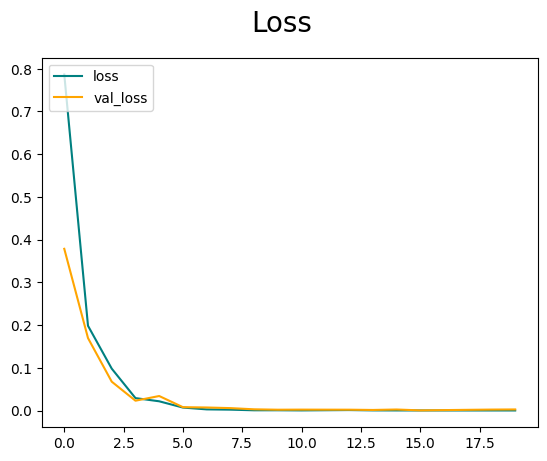

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

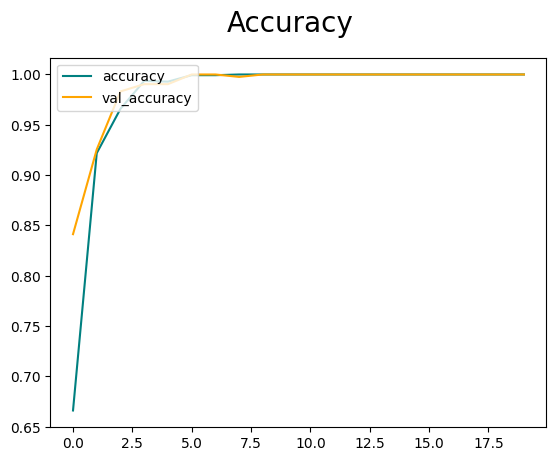

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
# I get an error once categorical is added
  #  pre.update_state(y, yhat)
# Another error, must not need
  # re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 117ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.10880829, shape=(), dtype=float32)


# 10. Test a Whole MRI Scan

In [65]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [94]:
import cv2
from dcm_to_png import *
from rotate import *

In [95]:
# Define the classes
classes = ['control', 'autism', 'parkinson', 'alzheimer']

In [96]:
# Define the path to the folder containing the images
folder_path = '../images/test_scans/whole_scans/alzheimer/002_S_0295'

In [97]:
# Convert dcm files to png images
converted_images = convert_folder_dcm_to_png(folder_path, folder_path)
if converted_images:
    print(f"Converted {len(converted_images)} DICOM images to PNG.")
else:
    print("No DICOM images converted to PNG.")

Converted 52 DICOM images to PNG.


In [98]:
# Rotate the images
rotate_images(folder_path)

Rotated: ppmicontrol_1_scan0.png
Rotated: ppmicontrol_1_scan1.png
Rotated: ppmicontrol_1_scan10.png
Rotated: ppmicontrol_1_scan11.png
Rotated: ppmicontrol_1_scan12.png
Rotated: ppmicontrol_1_scan13.png
Rotated: ppmicontrol_1_scan14.png
Rotated: ppmicontrol_1_scan15.png
Rotated: ppmicontrol_1_scan16.png
Rotated: ppmicontrol_1_scan17.png
Rotated: ppmicontrol_1_scan18.png
Rotated: ppmicontrol_1_scan19.png
Rotated: ppmicontrol_1_scan2.png
Rotated: ppmicontrol_1_scan20.png
Rotated: ppmicontrol_1_scan21.png
Rotated: ppmicontrol_1_scan22.png
Rotated: ppmicontrol_1_scan23.png
Rotated: ppmicontrol_1_scan24.png
Rotated: ppmicontrol_1_scan25.png
Rotated: ppmicontrol_1_scan26.png
Rotated: ppmicontrol_1_scan27.png
Rotated: ppmicontrol_1_scan28.png
Rotated: ppmicontrol_1_scan29.png
Rotated: ppmicontrol_1_scan3.png
Rotated: ppmicontrol_1_scan30.png
Rotated: ppmicontrol_1_scan31.png
Rotated: ppmicontrol_1_scan32.png
Rotated: ppmicontrol_1_scan33.png
Rotated: ppmicontrol_1_scan34.png
Rotated: ppmicontr

In [99]:
# Function to resize and preprocess the image
def preprocess_image(image):
    resize = tf.image.resize(image, (256, 256))
    return resize / 255

In [100]:
# Initialize counters for each class
class_counts = {c: 0 for c in classes}

In [101]:
# Scan the folder and process each image
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        # Preprocess the image
        preprocessed_img = preprocess_image(img)
        
        # Make the prediction
        yhat = model.predict(np.expand_dims(preprocessed_img, 0))
        predicted_class = np.argmax(yhat, axis=1)[0]
        
        # Get the predicted class label
        predicted_label = classes[predicted_class]
        
        # Check if the predicted class is not control
        if predicted_class != 0:
            # Print the file name and class of the image
            print('File:', filename)
            print('Predicted class:', predicted_label)
            print('*** Image does not belong to the control class ***')
            print('---')
        
        # Increment the counter for the predicted class
        class_counts[predicted_label] += 1

1/1 [==============================] - 0s 18ms/step
File: ppmicontrol_1_scan0.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 17ms/step
File: ppmicontrol_1_scan1.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 16ms/step
File: ppmicontrol_1_scan10.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 17ms/step
File: ppmicontrol_1_scan11.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 16ms/step
File: ppmicontrol_1_scan12.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 18ms/step
File: ppmicontrol_1_scan13.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [=======

In [102]:
class_counts

{'control': 1, 'autism': 0, 'parkinson': 0, 'alzheimer': 51}

In [103]:
# Calculate and print the percentage of images belonging to each class
total_images = sum(class_counts.values())
print('Percentage of images belonging to each class:')
for class_name, count in class_counts.items():
    percentage = (count / total_images) * 100
    print(f'{class_name}: {percentage:.2f}%')

Percentage of images belonging to each class:
control: 1.92%
autism: 0.00%
parkinson: 0.00%
alzheimer: 98.08%


In [104]:
# Predict most likely condition
condition = max(class_counts, key=class_counts.get)
# max_value = class_counts[condition]
print(f"The most likely condition is {condition}'s")

The most likely condition is alzheimer's


# 11. Save the Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join('models', 'brainclassifier.h5'))

In [53]:
#new_model = load_model('models/imageclassifier.h5') this worked but he updated his in video to the one below
new_model = load_model(os.path.join('models', 'brainclassifier.h5'))
#he also saved an entirely new model with this

In [54]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


array([[0.72557056, 0.61615545, 0.47307152]], dtype=float32)